# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 1 -  Análisis y Visualización

## Introducción

En el mundo de las finanzas tradicionales, el rendimiento de los activos puede variar bajo diferentes condiciones de mercado, es entonces cuando entra en juego la diversificación. La finalidad de la exposición a diferentes clases de activos es equilibrar el riesgo y el rendimiento de una cartera.

Cuando hablamos de cripto activos, la diversificación también es una de las formas de gestionar la exposición al riesgo. Sin embargo, la alta correlación entre algunos activos y su volatilidad, dificulta la selección de una cartera equilibrada. A pesar de ello, con un portafolio cuidadosamente seleccionado de monedas alternativas, junto con algunas monedas estables, se podría invertir en el mercado de manera más efectiva con un riesgo manejable.
El objetivo principal de este proyecto es determinar una forma de seleccionar algunos activos para nuestra cartera, tomados de un conjunto más amplio, según los momentos de mercado. Para ello echaremos mano del análisis técnico, que nos ayudará a estudiar el comportamiento del precio de los activos.

En este primer práctico se pretende obtener un primer acercamiento a los datos. En primer lugar se cargan y presentan brevemente los datos, luego se proponen las consignas a seguir para la resolución del mismo.

### 📌 Carga del dataset 

Primero, se comienza importando las librerías necesarias. Luego, cargamos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [1]:
import pandas as pd
from datetime import datetime

#librerías extra para ploteo de candlesticks
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns

sns.set_context('notebook')

In [2]:
# Los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice
df_BTC = pd.read_csv("../data/BTCUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)
df_EOS = pd.read_csv("../data/EOSUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)
df_ETC = pd.read_csv("../data/ETCUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)
df_ETH = pd.read_csv("../data/ETHUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)
df_LINK = pd.read_csv("../data/LINKUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)
df_LTC = pd.read_csv("../data/LTCUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)

# df_BTC = pd.read_csv("../data/BTCUSDT.csv")
# df_EOS = pd.read_csv("../data/EOSUSDT.csv")
# df_ETC = pd.read_csv("../data/ETCUSDT.csv")
# df_ETH = pd.read_csv("../data/ETHUSDT.csv")
# df_LINK = pd.read_csv("../data/LINKUSDT.csv")
# df_LTC = pd.read_csv("../data/LTCUSDT.csv")



In [3]:
df_BTC_colum=df_BTC.assign(Coin='BTCUSDT')
df_BTC_colum.head()[:3]

open     high      low    close       volume     Coin
date                                                                         
2019-01-01 00:00:00  3690.00  3720.00  3685.78  3703.56  3346.849726  BTCUSDT
2019-01-01 04:00:00  3703.63  3732.00  3696.14  3713.07  3200.719832  BTCUSDT
2019-01-01 08:00:00  3713.07  3756.94  3684.21  3698.53  3324.094679  BTCUSDT

In [4]:
df_EOS_colum=df_EOS.assign(Coin='EOSUSDT')
df_EOS_colum.head()[:3]

open    high     low   close      volume     Coin
date                                                                    
2019-01-01 00:00:00  2.5206  2.5600  2.5204  2.5383   474419.58  EOSUSDT
2019-01-01 04:00:00  2.5388  2.5958  2.5373  2.5697   775493.49  EOSUSDT
2019-01-01 08:00:00  2.5710  2.6033  2.5309  2.5459  1138735.80  EOSUSDT

In [5]:
df_ETC_colum=df_ETC.assign(Coin='ETCUSDT')
df_ETC_colum.head()[:3]

open    high     low   close    volume     Coin
date                                                                  
2019-01-01 00:00:00  4.9419  5.1127  4.9379  5.0456  45501.84  ETCUSDT
2019-01-01 04:00:00  5.0456  5.1300  5.0272  5.0511  37698.94  ETCUSDT
2019-01-01 08:00:00  5.0490  5.0945  5.0169  5.0239  16591.07  ETCUSDT

In [6]:
df_ETH_colum=df_ETH.assign(Coin='ETHUSDT')
df_ETH_colum.head()[:3]

open   high     low   close       volume     Coin
date                                                                    
2019-01-01 00:00:00  130.72  134.0  130.71  133.36  48477.89116  ETHUSDT
2019-01-01 04:00:00  133.36  135.3  133.01  133.86  47840.61663  ETHUSDT
2019-01-01 08:00:00  133.89  136.0  132.95  133.57  44048.78863  ETHUSDT

In [7]:
df_LINK_colum=df_LINK.assign(Coin='LINKUSDT')
df_LINK_colum.head()[:3]

open    high     low   close     volume      Coin
date                                                                    
2019-01-16 08:00:00  0.5146  0.5162  0.4668  0.4746  573395.11  LINKUSDT
2019-01-16 12:00:00  0.4760  0.5200  0.4677  0.5016  352805.51  LINKUSDT
2019-01-16 16:00:00  0.5000  0.5200  0.4854  0.4858  269742.36  LINKUSDT

In [8]:
df_LTC_colum=df_LTC.assign(Coin='LTCUSDT')
df_LTC_colum.head()[:3]

open   high    low  close       volume     Coin
date                                                                 
2019-01-01 00:00:00  29.73  30.16  29.57  30.12  10344.49821  LTCUSDT
2019-01-01 04:00:00  30.14  30.67  30.13  30.34   8793.09194  LTCUSDT
2019-01-01 08:00:00  30.35  30.79  30.24  30.29  20755.11106  LTCUSDT

In [9]:
frames = [df_BTC_colum, df_EOS_colum, df_ETC_colum,df_ETH_colum,df_LINK_colum,df_LTC_colum]
df_all = pd.concat(frames)
df_all.head()[:3]

open     high      low    close       volume     Coin
date                                                                         
2019-01-01 00:00:00  3690.00  3720.00  3685.78  3703.56  3346.849726  BTCUSDT
2019-01-01 04:00:00  3703.63  3732.00  3696.14  3713.07  3200.719832  BTCUSDT
2019-01-01 08:00:00  3713.07  3756.94  3684.21  3698.53  3324.094679  BTCUSDT

In [10]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows

    # total unique values
    d2['unique']=data2.nunique().values
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [11]:
status(df_all)

variable  q_nan     p_nan  q_zeros  p_zeros  unique     type
0     open      0  0.000000        0      0.0   36847  float64
1     high    103  0.002354        0      0.0   35234  float64
2      low    103  0.002354        0      0.0   35366  float64
3    close    103  0.002354        0      0.0   36761  float64
4   volume    103  0.002354        0      0.0   43647  float64
5     Coin      0  0.000000        0      0.0       6   object

In [12]:
df_all['Year'] = df_all.index.year
df_all['Month'] = df_all.index.month
df_all['Day'] = df_all.index.day
df_all['Time'] = df_all.index.time
df_all['Hour'] = df_all.index.hour
df_all['Weekday Name'] = df_all.index.day_name()

df_all['Profit'] = df_all['close']-df_all['open']

df_all

open     high      low    close         volume  \
date                                                                     
2019-01-01 00:00:00  3690.00  3720.00  3685.78  3703.56    3346.849726   
2019-01-01 04:00:00  3703.63  3732.00  3696.14  3713.07    3200.719832   
2019-01-01 08:00:00  3713.07  3756.94  3684.21  3698.53    3324.094679   
2019-01-01 12:00:00  3698.28  3701.68  3642.00  3659.41    3089.291395   
2019-01-01 16:00:00  3659.56  3730.01  3659.56  3711.20    4906.805931   
...                      ...      ...      ...      ...            ...   
2022-05-04 20:00:00   105.50   106.90   105.50   106.40   38212.587000   
2022-05-05 00:00:00   106.30   106.40   105.10   105.30   41031.557000   
2022-05-05 04:00:00   105.30   105.60   104.50   105.20   51883.487000   
2022-05-05 08:00:00   105.10   105.50   100.40   100.90  119028.195000   
2022-05-05 12:00:00   100.90      NaN      NaN      NaN            NaN   

                        Coin  Year  Month  Day      Time  Hour Weekday Name  \
date                                                                          
2019-01-01 00:00:00  BTCUSDT  2019      1    1  00:00:00     0      Tuesday   
2019-01-01 04:00:00  BTCUSDT  2019      1    1  04:00:00     4      Tuesday   
2019-01-01 08:00:00  BTCUSDT  2019      1    1  08:00:00     8      Tuesday   
2019-01-01 12:00:00  BTCUSDT  2019      1    1  12:00:00    12      Tuesday   
2019-01-01 16:00:00  BTCUSDT  2019      1    1  16:00:00    16      Tuesday   
...                      ...   ...    ...  ...       ...   ...          ...   
2022-05-04 20:00:00  LTCUSDT  2022      5    4  20:00:00    20    Wednesday   
2022-05-05 00:00:00  LTCUSDT  2022      5    5  00:00:00     0     Thursday   
2022-05-05 04:00:00  LTCUSDT  2022      5    5  04:00:00     4     Thursday   
2022-05-05 08:00:00  LTCUSDT  2022      5    5  08:00:00     8     Thursday   
2022-05-05 12:00:00  LTCUSDT  2022      5    5  12:00:00    12     Thursday   

                     Profit  
date                         
2019-01-01 00:00:00   13.56  
2019-01-01 04:00:00    9.44  
2019-01-01 08:00:00  -14.54  
2019-01-01 12:00:00  -38.87  
2019-01-01 16:00:00   51.64  
...                     ...  
2022-05-04 20:00:00    0.90  
2022-05-05 00:00:00   -1.00  
2022-05-05 04:00:00   -0.10  
2022-05-05 08:00:00   -4.20  
2022-05-05 12:00:00     NaN  

[43750 rows x 13 columns]

**Candlestick charts**

Este tipo de gráficos se utiliza como una herramienta para visualizar y analizar el movimiento de los precios a lo largo del tiempo. Nos muestra la información de los precios de OHLC (open, high, low, close) en cada una de las sesiones (una sesión es un periodo de tiempo definido, en nuestro caso 1 hora.)

In [13]:
trace = go.Candlestick(x=df_BTC_colum.index,
                open=df_BTC_colum.open,
                high=df_BTC_colum.high,
                low=df_BTC_colum.low,
                close=df_BTC_colum.close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [14]:
trace = go.Candlestick(x=df_EOS_colum.index,
                open=df_EOS_colum.open,
                high=df_EOS_colum.high,
                low=df_EOS_colum.low,
                close=df_EOS_colum.close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [15]:
trace = go.Candlestick(x=df_all.index,
                open=df_all.open,
                high=df_all.high,
                low=df_all.low,
                close=df_all.close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [16]:
df_all['Hour'].describe()

count    43750.000000
mean        10.014354
std          6.827865
min          0.000000
25%          4.000000
50%         12.000000
75%         16.000000
max         20.000000
Name: Hour, dtype: float64

In [17]:
print(df_all['Hour'].min())

print(np.percentile(df_all['Hour'], 20))

print(np.percentile(df_all['Hour'], 40))

print(np.percentile(df_all['Hour'], 80))

print(df_all['Hour'].max())


0
4.0
8.0
16.0
20


In [18]:
print(df_all['Hour'].max() - np.percentile(df_all['Hour'], 80) )
print(np.percentile(df_all['Hour'], 40) - np.percentile(df_all['Hour'], 20))
print(np.percentile(df_all['Hour'], 20) - np.percentile(df_all['Hour'], 00))

4.0
4.0
4.0


<AxesSubplot:xlabel='date'>

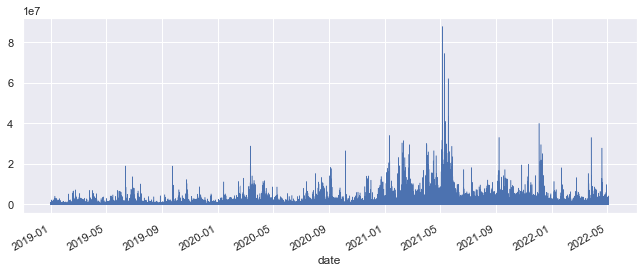

In [19]:
sns.set(rc={'figure.figsize':(11, 4)})
df_all['volume'].plot(linewidth=0.5)

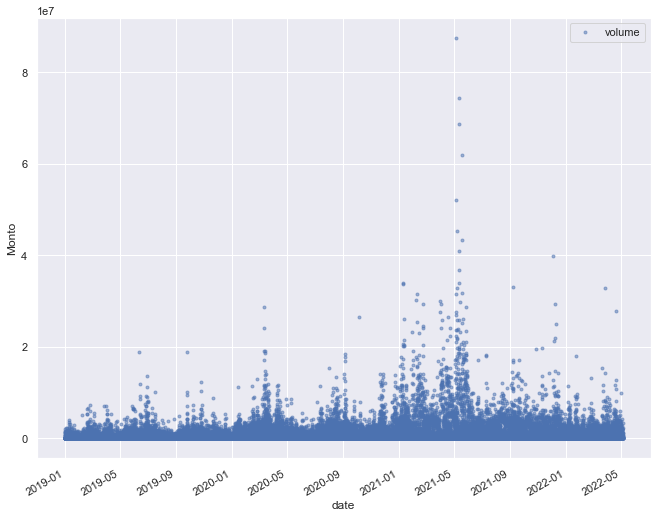

In [20]:
cols_plot = ['volume']
axes = df_all[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Monto')

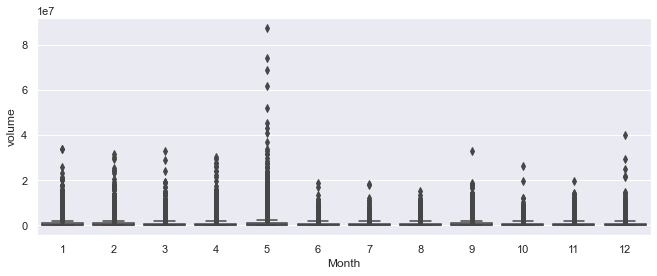

In [21]:
sns.boxplot(data=df_all,x='Month', y='volume');

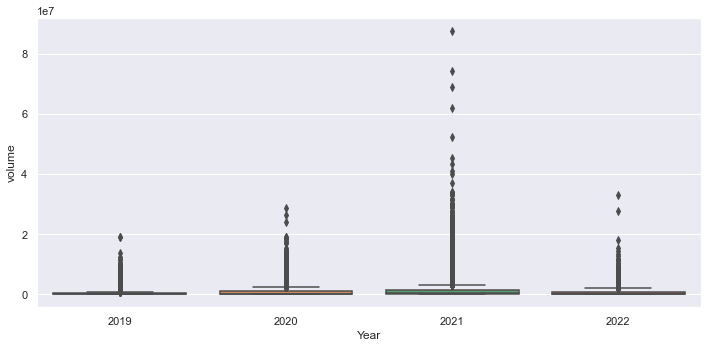

In [22]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data = df_all, x='Year', y = 'volume')
fig.tight_layout()
plt.show()

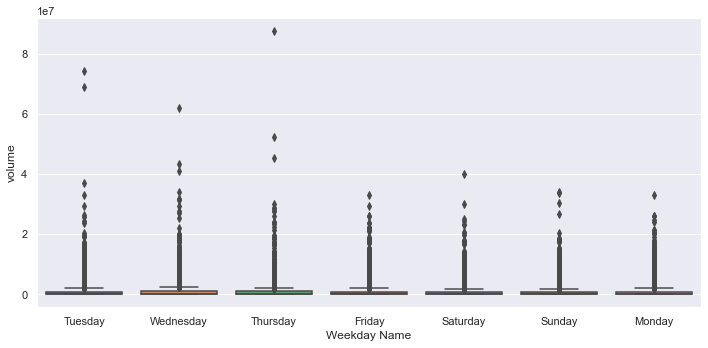

In [23]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data = df_all, x='Weekday Name', y = 'volume')
fig.tight_layout()
plt.show()

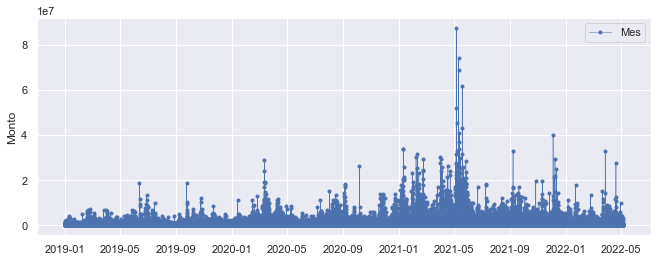

In [311]:
start, end = '2019-01', '2022-06'

fig, ax = plt.subplots()
ax.plot(df_all.loc[start:end, 'volume'],
marker='.', linestyle='-', linewidth=0.5, label='Mes')
ax.set_ylabel('Monto')
ax.legend();

# Revisar

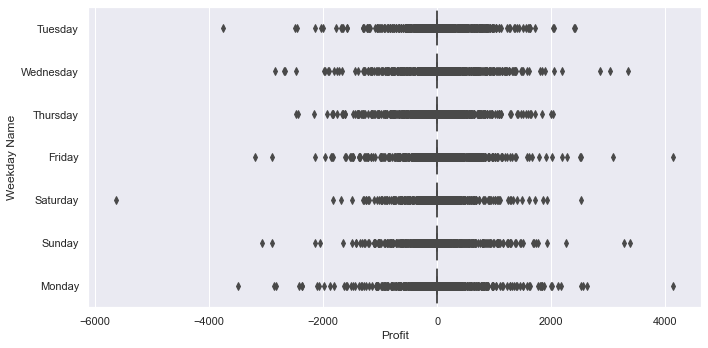

In [25]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data = df_all, x='Profit', y = 'Weekday Name')
fig.tight_layout()
plt.show()

In [82]:
pd.options.display.float_format = '{:,.1f}'.format
df_all_mean = df_all.groupby(by = 'Month').mean()
df_all_mean

open    high     low   close      volume    Year  Day  Hour  Profit
Month                                                                       
1     3,939.6 3,996.3 3,876.7 3,939.1   855,629.1 2,020.5 16.2  10.0    -0.5
2     4,371.3 4,433.3 4,314.0 4,378.5   907,787.2 2,020.5 14.6  10.0     4.3
3     4,712.5 4,771.9 4,662.5 4,720.1   822,904.0 2,020.5 16.0  10.0     2.9
4     4,882.6 4,920.8 4,824.0 4,875.3   953,926.2 2,020.5 15.5  10.0    -0.1
5     3,914.5 3,968.1 3,834.4 3,904.6 1,386,897.8 2,020.1 15.4  10.0    -4.8
6     3,217.5 3,265.5 3,173.5 3,221.3   670,664.9 2,020.0 15.5  10.0    -0.3
7     3,191.2 3,227.5 3,157.0 3,193.9   648,223.8 2,020.0 16.0  10.0     2.7
8     3,996.5 4,031.3 3,952.7 3,994.8   764,210.6 2,020.0 16.0  10.0     1.2
9     3,924.9 3,961.5 3,880.4 3,923.1   832,239.5 2,020.0 15.5  10.0    -1.8
10    4,589.8 4,636.5 4,546.6 4,596.4   635,601.2 2,020.0 16.0  10.0     6.6
11    5,072.1 5,138.9 5,035.7 5,090.1   755,510.1 2,020.0 15.5  10.0     0.6
12    4,652.3 4,701.3 4,597.9 4,652.7   712,605.4 2,020.0 16.0  10.0    -0.6

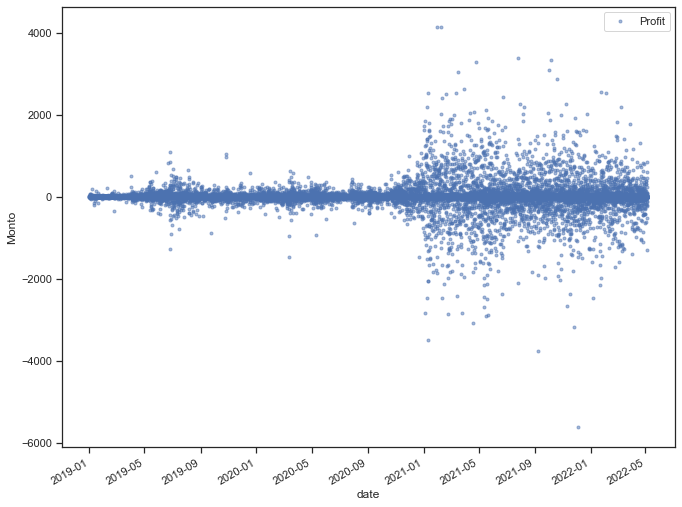

In [87]:
cols_plot = ['Profit']
axes = df_all[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Monto')

In [24]:
df_all

open     high      low    close         volume  \
date                                                                     
2019-01-01 00:00:00  3690.00  3720.00  3685.78  3703.56    3346.849726   
2019-01-01 04:00:00  3703.63  3732.00  3696.14  3713.07    3200.719832   
2019-01-01 08:00:00  3713.07  3756.94  3684.21  3698.53    3324.094679   
2019-01-01 12:00:00  3698.28  3701.68  3642.00  3659.41    3089.291395   
2019-01-01 16:00:00  3659.56  3730.01  3659.56  3711.20    4906.805931   
...                      ...      ...      ...      ...            ...   
2022-05-04 20:00:00   105.50   106.90   105.50   106.40   38212.587000   
2022-05-05 00:00:00   106.30   106.40   105.10   105.30   41031.557000   
2022-05-05 04:00:00   105.30   105.60   104.50   105.20   51883.487000   
2022-05-05 08:00:00   105.10   105.50   100.40   100.90  119028.195000   
2022-05-05 12:00:00   100.90      NaN      NaN      NaN            NaN   

                        Coin  Year  Month  Day      Time  Hour Weekday Name  \
date                                                                          
2019-01-01 00:00:00  BTCUSDT  2019      1    1  00:00:00     0      Tuesday   
2019-01-01 04:00:00  BTCUSDT  2019      1    1  04:00:00     4      Tuesday   
2019-01-01 08:00:00  BTCUSDT  2019      1    1  08:00:00     8      Tuesday   
2019-01-01 12:00:00  BTCUSDT  2019      1    1  12:00:00    12      Tuesday   
2019-01-01 16:00:00  BTCUSDT  2019      1    1  16:00:00    16      Tuesday   
...                      ...   ...    ...  ...       ...   ...          ...   
2022-05-04 20:00:00  LTCUSDT  2022      5    4  20:00:00    20    Wednesday   
2022-05-05 00:00:00  LTCUSDT  2022      5    5  00:00:00     0     Thursday   
2022-05-05 04:00:00  LTCUSDT  2022      5    5  04:00:00     4     Thursday   
2022-05-05 08:00:00  LTCUSDT  2022      5    5  08:00:00     8     Thursday   
2022-05-05 12:00:00  LTCUSDT  2022      5    5  12:00:00    12     Thursday   

                     Profit  
date                         
2019-01-01 00:00:00   13.56  
2019-01-01 04:00:00    9.44  
2019-01-01 08:00:00  -14.54  
2019-01-01 12:00:00  -38.87  
2019-01-01 16:00:00   51.64  
...                     ...  
2022-05-04 20:00:00    0.90  
2022-05-05 00:00:00   -1.00  
2022-05-05 04:00:00   -0.10  
2022-05-05 08:00:00   -4.20  
2022-05-05 12:00:00     NaN  

[43750 rows x 13 columns]

#### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT (un token de USD)


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

# 📖 ¡Actividades! 

El objetivo general del práctico es realizar un análsis exploratorio del comportamiento de los __activos__ propuestos.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. 

A continuación comparto algunos links que puede ser de ayuda para el abordaje de nuestro problema.

- [Tutorial: Time Series analysis with pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Kaggle : Everything you can do with a time series](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)
- [Kaggle: Time series analysis in Python](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)

***Sugerencia*** Si creemos que repetiremos un bloque de código varias veces, entonces será bueno modularizar esos bloques dentro de funciones.

## Parte I

Se proponen las siguientes actividades:


- Determinen el tipo de variables y el período de tiempo bajo análisis. ¿El periodo es el mismo para todos los activos?


- Indaguen sobre la existencia de valores faltantes. Para discutir, ¿cómo tratarían a los faltantes? ¿por qué? 


- Analicen las distribuciones por medio de gráficos y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación). Pueden pensar en una ventana de tiempo móvil para calcular dichas medidas (indaguen el método `.rolling()`). **(AA)**


- ¿Hay outliers?  **(AA)**


- Seleccionen algunos activos y grafiquen un boxplot con los datos de cada mes (y/o semana). ¿La distribución se mantiene constante en el tiempo?  **(AA)**


- Exploren la existencia de estacionalidad.  **(AA)**


- Estudien la evolución temporal de los activos. ¿En qué sentido tienden a moverse? ¿Detectan períodos de crisis? ¿Los activos tienden a moverse en forma conjunta?  En caso de que existan crisis, ¿son globales o individuales? Para poder realizar una mejor comparación, deberán normalizar los datos. 

## Parte II

Que el precio de un activo sea mayor al de otro no significa que el primero sea una mejor inversión, entonces, el análisis de este tipo de series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los precios de los activos, previamente se habitúa realizar una transformación logarítmica o trabajar con la tasa de rendimiento. 


- Calculen los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método `.pct_change()`). Muestren graficamente algunos de ellos.


- Realicen nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series. **(AA)**


- Exploren la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles. **(AA)**


**(AA)**: Algunos activos.

## Opcional


**¿Los días de la semana influyen en el precio de los activos?**

Según un [estudio realizado](https://www.sciencedirect.com/science/article/pii/S1544612318304240), los valores de Bitcoin son significativamente más altos los días lunes. ¿Qué pueden decir al respecto? 

Agrupen los datos de acuerdo a los días de la semana y exploren la estacionalidad diaria. Comparen los gráficos de Bitcoin con el de otro activos. 

# Fecha de entrega

- __Versión preliminar: 20/5__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 